# Project 8: Data Preprocessing & Feature Engineering for Machine Learning (Housing Dataset)

# Project Brief for Self-Coders

Here you´ll have the opportunity to code major parts of Project 8 on your own. If you need any help or inspiration, have a look at the Videos or the Jupyter Notebook with the full code. <br> <br>
Keep in mind that it´s all about __getting the right results/conclusions__. It´s not about finding the identical code. Things can be coded in many different ways. Even if you come to the same conclusions, it´s very unlikely that we have the very same code. 

## Data Import and first Inspection

1. __Import__ the housing dataset (housing.csv) and __inspect__!

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


__Features__:

* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean

In [6]:
df[df.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df.total_rooms.value_counts()

total_rooms
1527.0     18
1613.0     17
1582.0     17
2127.0     16
1717.0     15
           ..
9614.0      1
10839.0     1
11872.0     1
6205.0      1
10035.0     1
Name: count, Length: 5926, dtype: int64

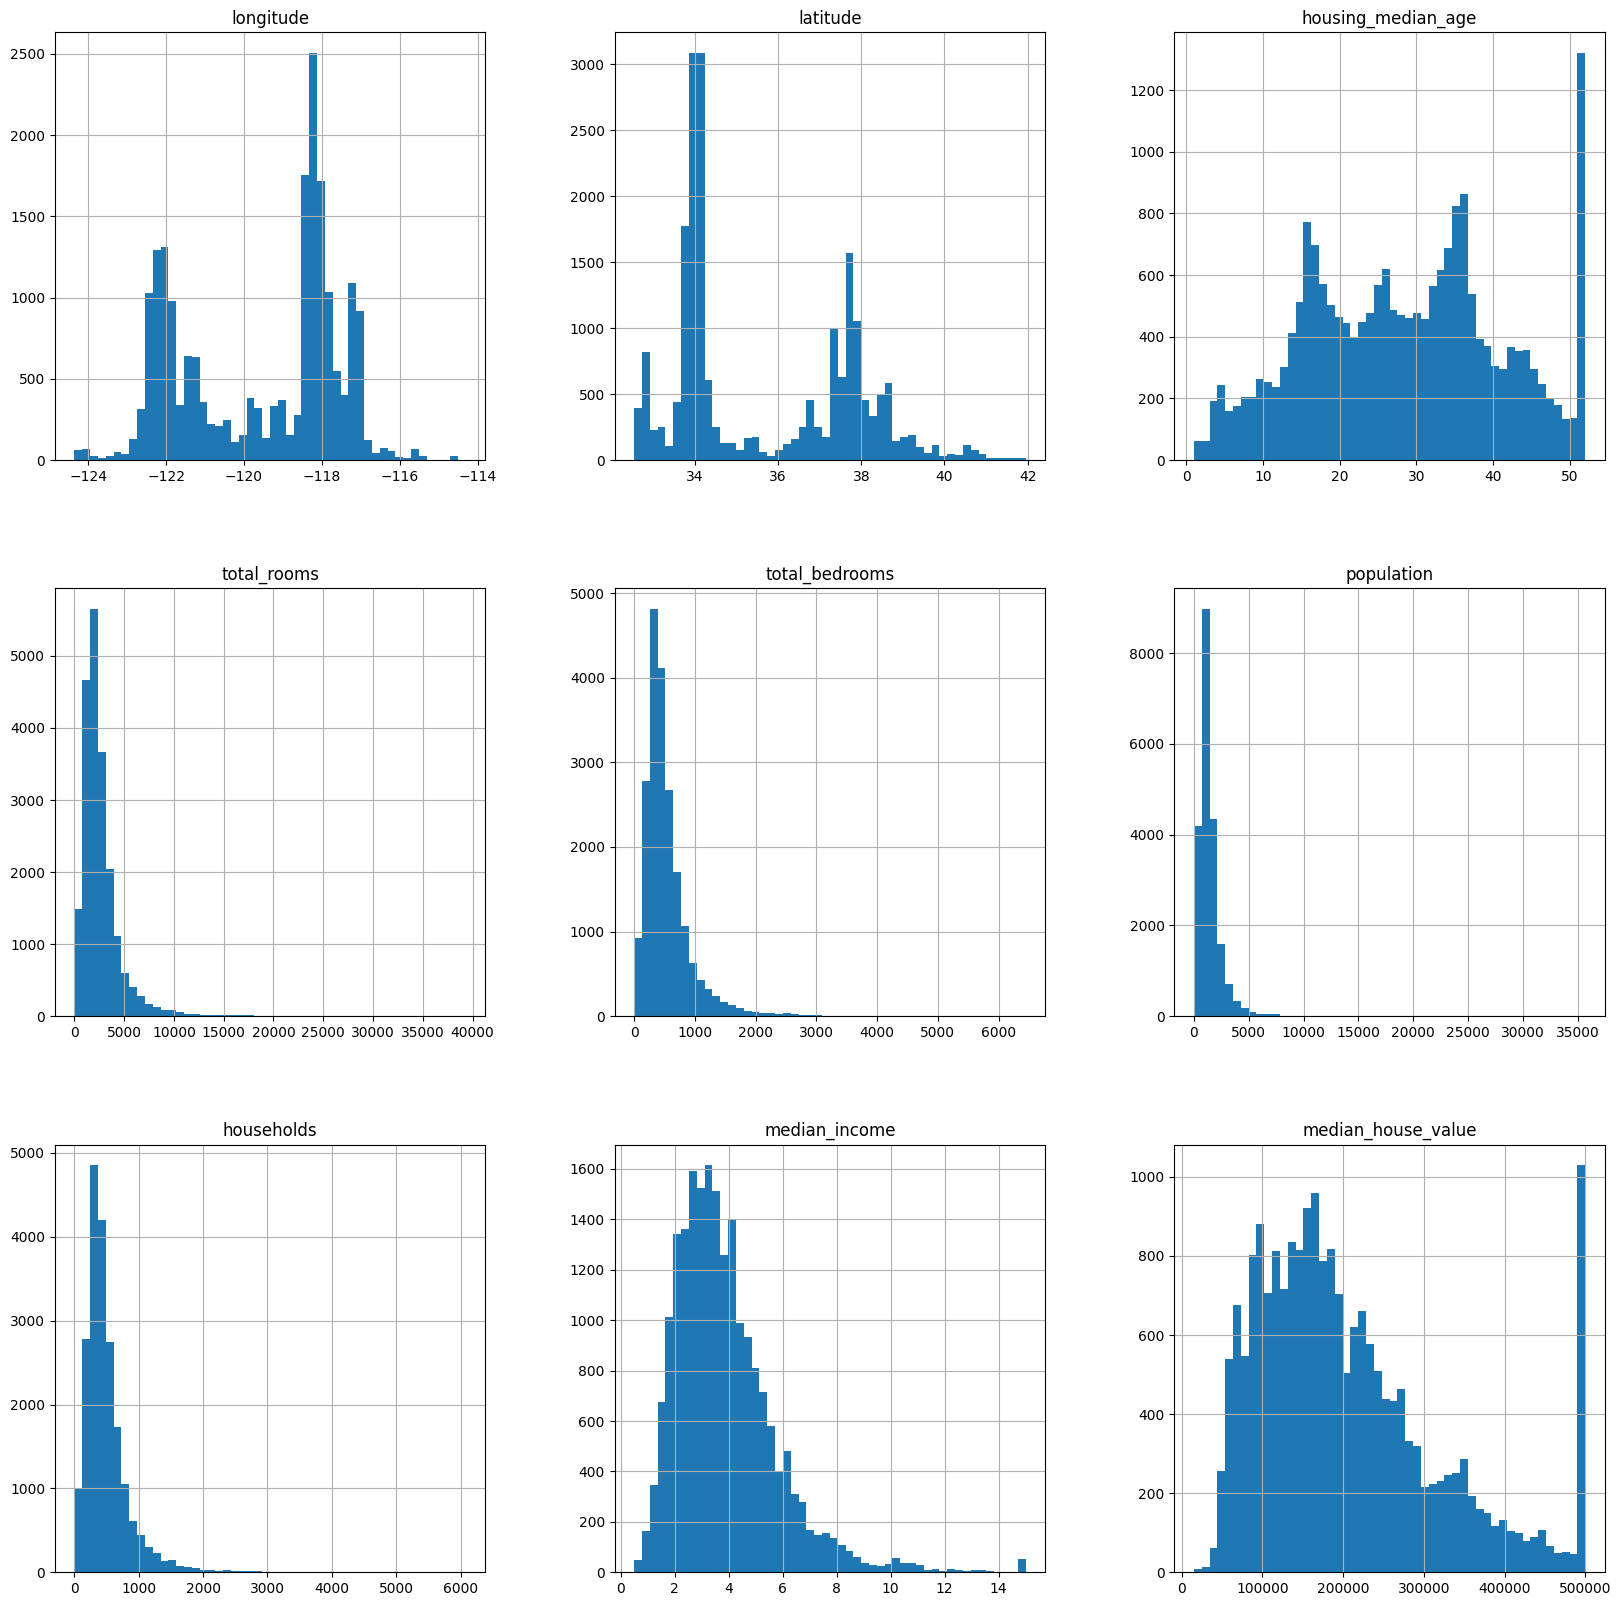

In [10]:
df.hist(bins = 50, figsize=(20,20))
plt.show()

## Data Cleaning and Creating additional Features

2. __Drop__ all rows with (at least one) missing value(s).

3. __Add__ the additional Feature __"rooms_per_household"__ (should be self-explanatory)

4. __Add__ the additional Feature __"population_per_household"__ (should be self-explanatory)

5. __Add__ the additional Feature __"bedrooms_per_household"__ (should be self-explanatory)

In [11]:
df.dropna(inplace=True)

In [12]:
df['rooms_per_household'] = df.total_rooms / df.households

In [22]:
df.rooms_per_household.nlargest(20)

12447    62.422222
1913     61.812500
11862    59.875000
1912     56.269231
9676     52.848214
11707    52.690476
2395     50.837838
1240     47.515152
11832    41.333333
11833    39.755906
1872     38.840909
20094    37.063492
1926     37.000000
13950    36.715385
10080    36.478261
11716    36.075472
13965    36.060606
1978     34.843750
9683     34.571429
1239     33.989691
Name: rooms_per_household, dtype: float64

In [14]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [21]:
df.loc[[19006, 11849,5342]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household
19006,-121.98,38.32,45.0,19.0,5.0,7460.0,6.0,10.2264,137500.0,INLAND,3.166667,1243.333333
11849,-121.00,39.75,8.0,1116.0,214.0,27.0,39.0,2.5893,83000.0,INLAND,28.615385,0.692308
5342,-118.44,34.04,16.0,18.0,6.0,3.0,4.0,0.5360,350000.0,<1H OCEAN,4.500000,0.750000


In [17]:
df = df.drop([1914, 1979, 5916, 8219])

In [18]:
df["pop_per_household"] = df.population.div(df.households)

In [19]:
df.pop_per_household.nlargest()

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
9172       83.171429
Name: pop_per_household, dtype: float64

In [20]:
df.pop_per_household.nsmallest()

11849    0.692308
5342     0.750000
19522    0.970588
19427    1.060606
4623     1.066176
Name: pop_per_household, dtype: float64

In [23]:
df["bedrooms_per_room"] = df.total_bedrooms.div(df.total_rooms)

In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20429.000000,20429.000000,20429.000000,20429.000000,20429.000000,20429.000000,20429.000000,20429.000000,20429.000000,20429.000000,20429.000000,20429.000000
mean,-119.570760,35.633062,28.631553,2636.844633,537.935631,1425.216849,499.527583,3.871236,206859.026531,5.418889,3.071662,0.212983
std,2.003729,2.136259,12.592321,2185.312636,421.390653,1133.155168,382.277444,1.899399,115426.025726,2.112206,10.439286,0.057673
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,788.000000,280.000000,2.563700,119500.000000,4.441860,2.429054,0.175426
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179800.000000,5.230769,2.817647,0.203156
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1723.000000,604.000000,4.744000,264700.000000,6.052381,3.281525,0.239784
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,62.422222,1243.333333,1.000000


## Which Factors influence House Prices?

6. __Calculate__ the __Correlation__ between "median_house_value" and all features. Which factors seems to influence house prices/values?

7. __Create__ a Seaborn Regression plot (__jointplot__) with income on the x-axis and house value on the y-axis.

8. __Create__ the following __scatterplot__ (df.plot(kind = "scatter")) with
- longitude on x-axis
- latitude on y-axis
- size (s) of data points determined by population
- color (c) of data points determined by median_house_value

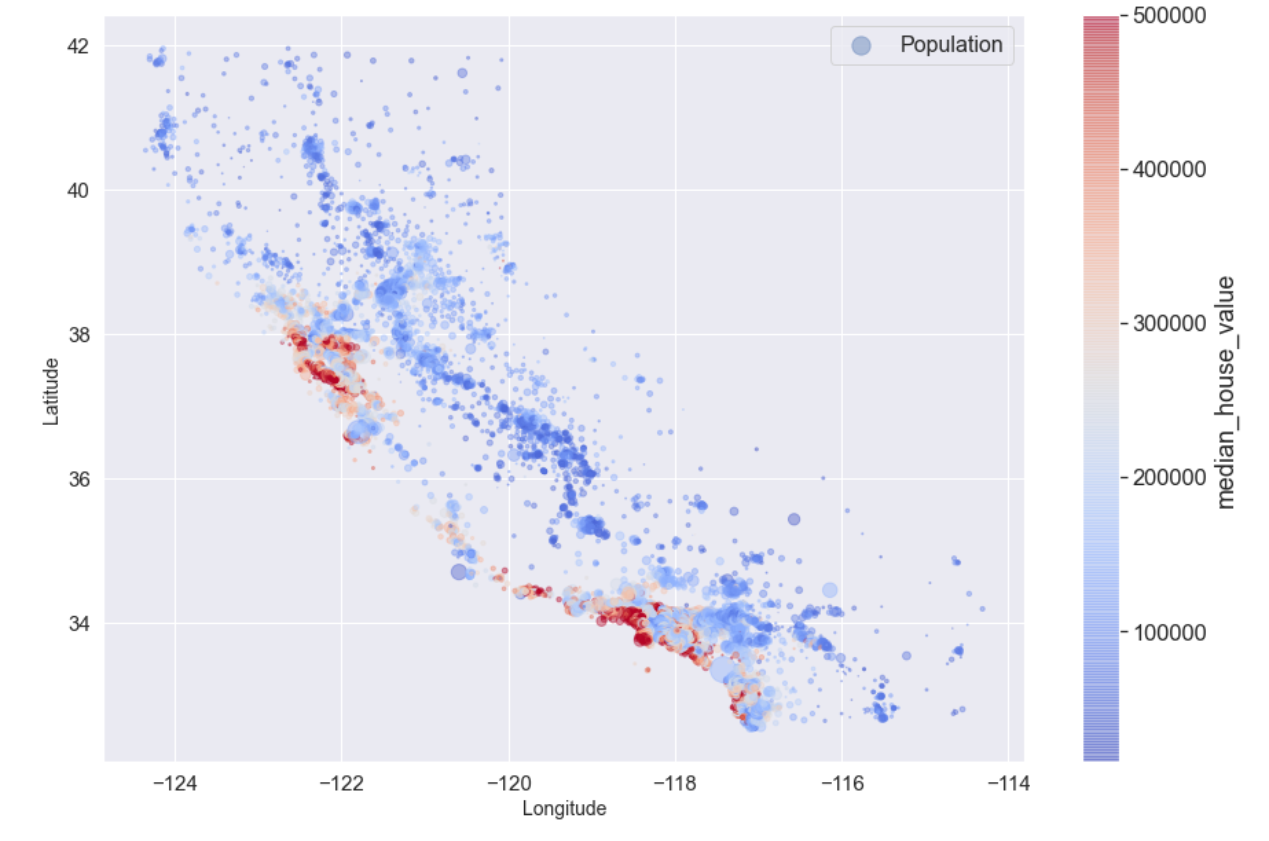

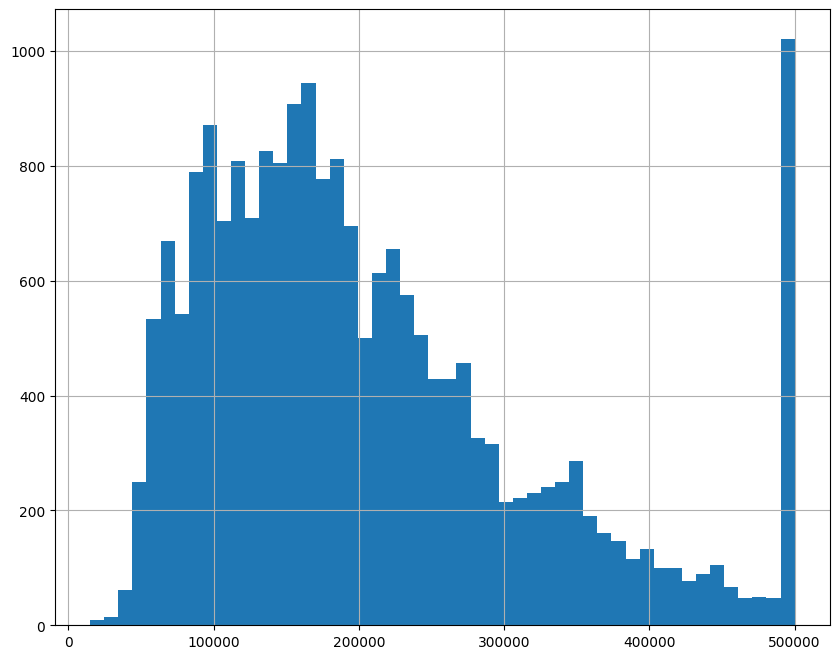

In [25]:
df.median_house_value.hist(bins=50, figsize=(10,8))
plt.show()

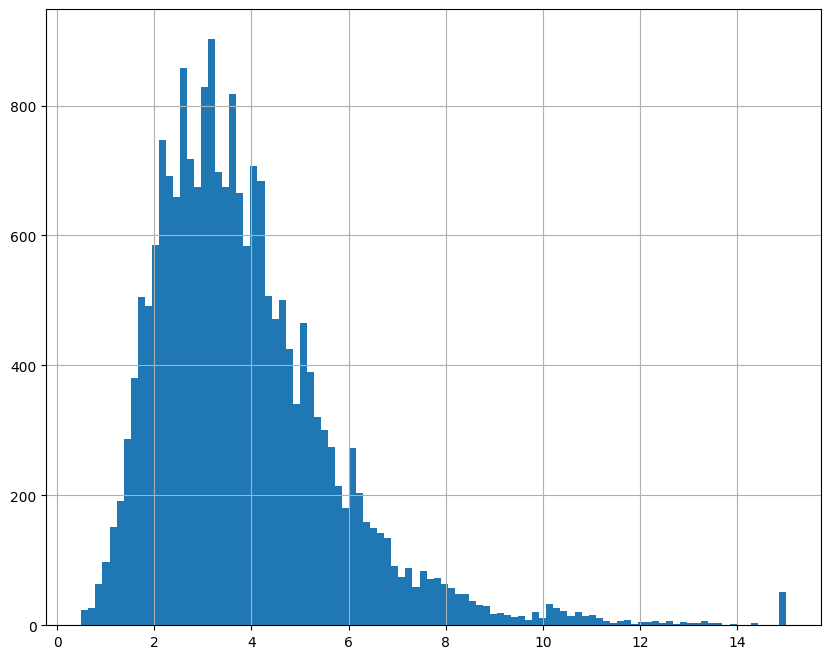

In [30]:
df.median_income.hist(bins = 100, figsize=(10,8))
plt.show()

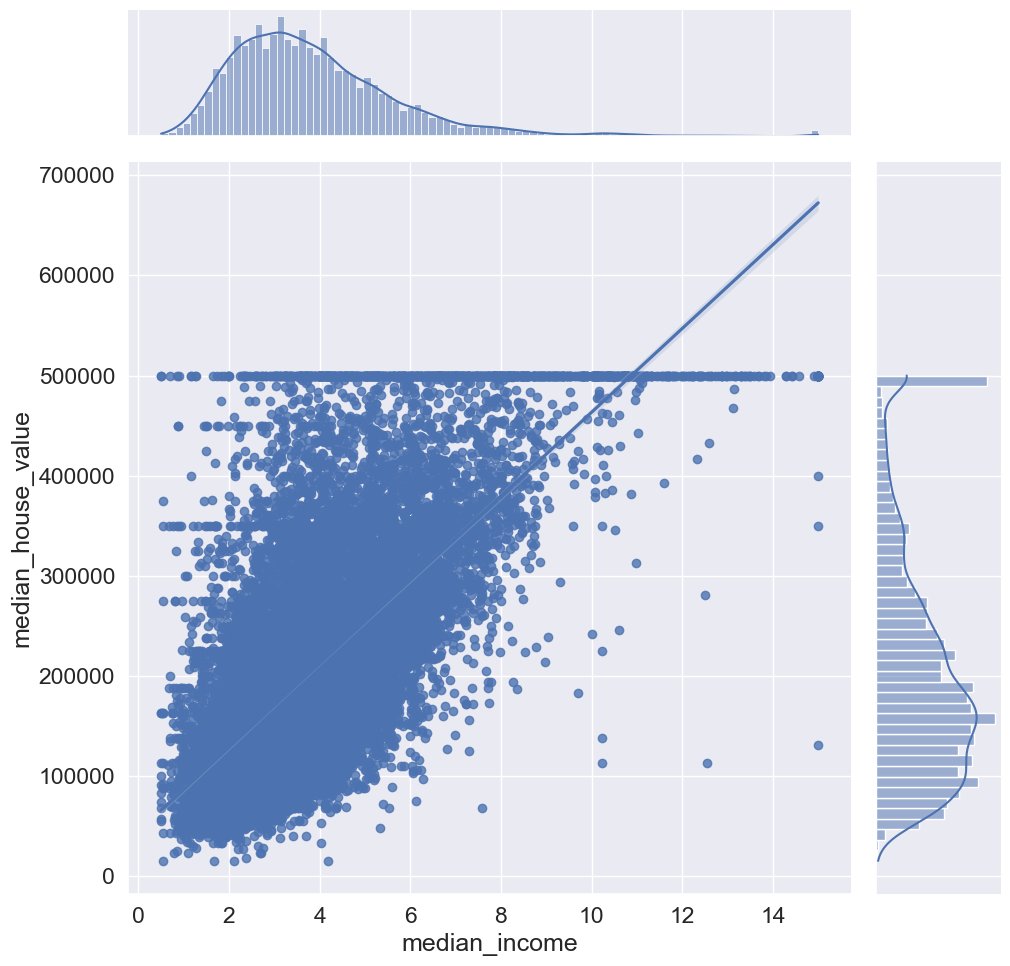

In [33]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = df.median_income, y = df.median_house_value, kind = 'reg', height = 10)
plt.show()

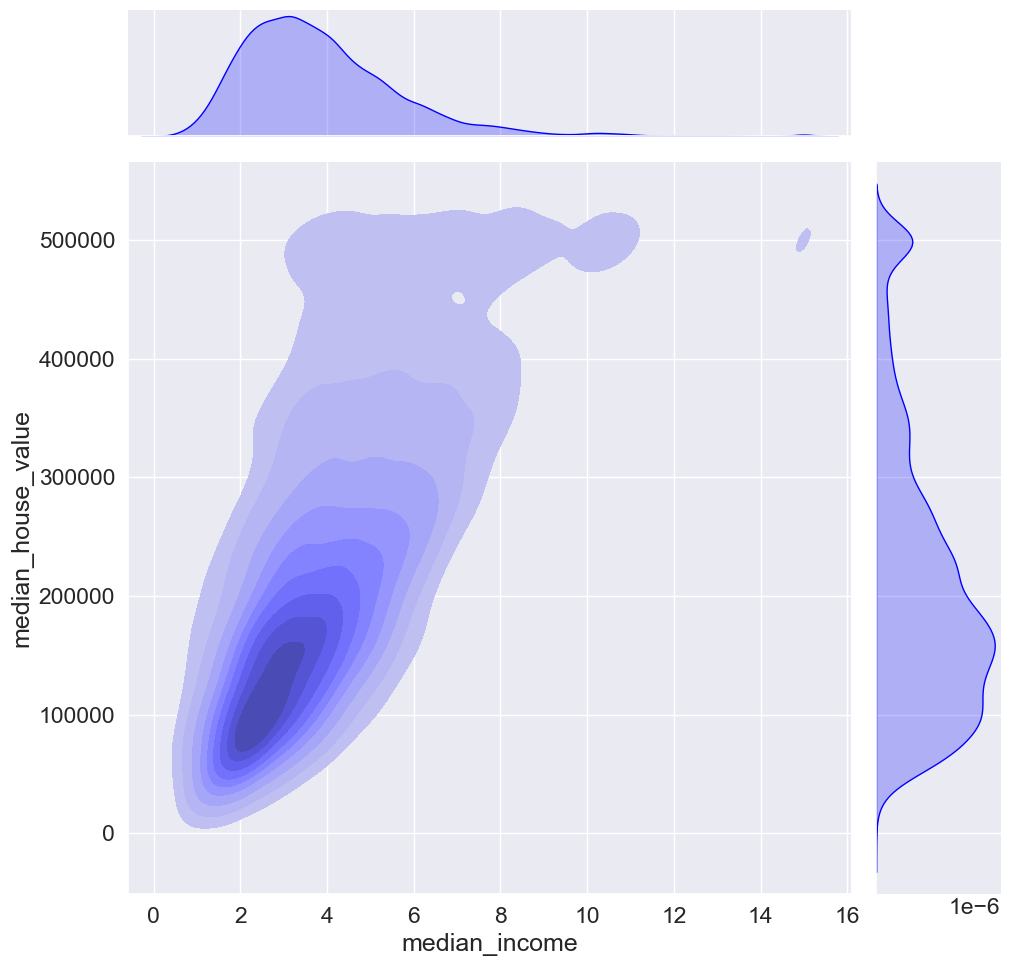

In [38]:
sns.jointplot(data=df, x='median_income', y='median_house_value', kind='kde', height=10, color='blue', fill=True)
plt.show()


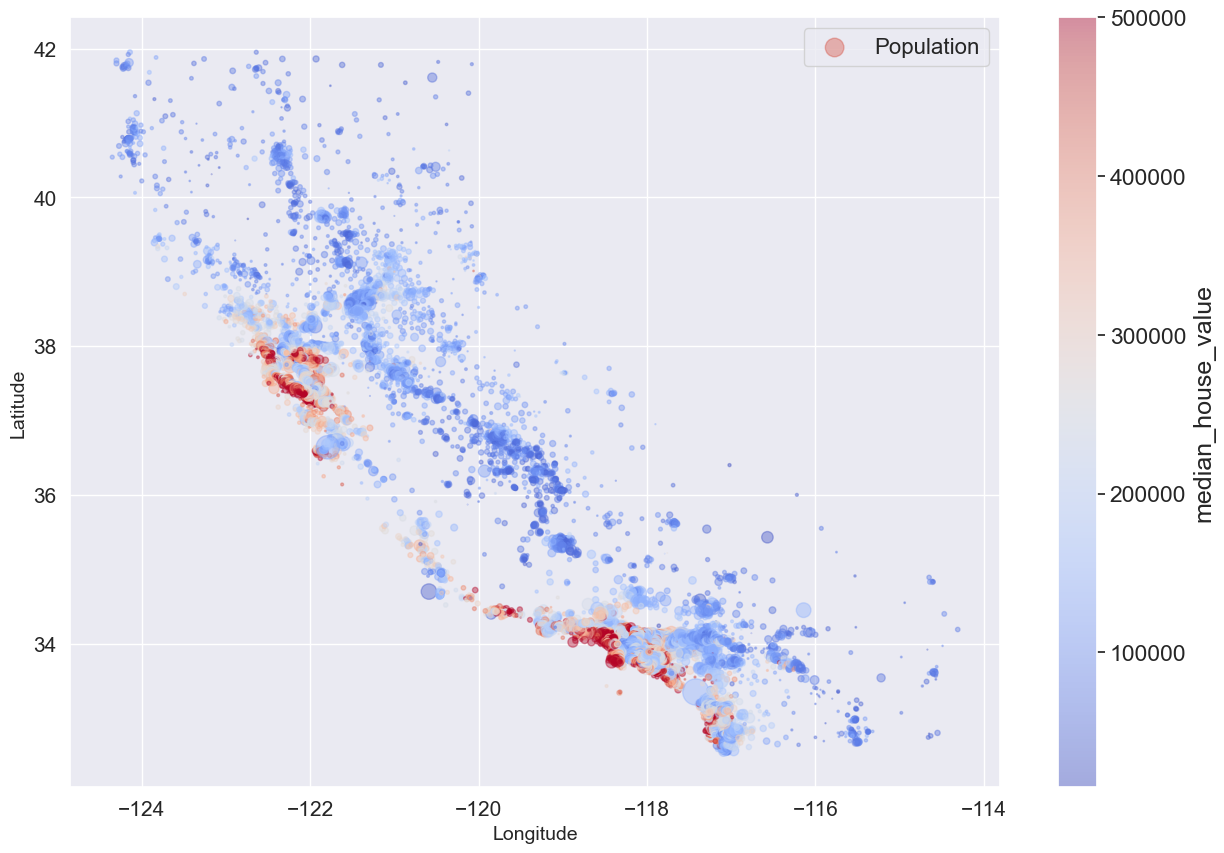

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap= "coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 15, sharex = False)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

9. Does this look familiar to you? It´s California. Let´s __add the map__ of California saved in __california.png__.

Hint: You can load and display the image california.png with the right latitude/longitude as follows:

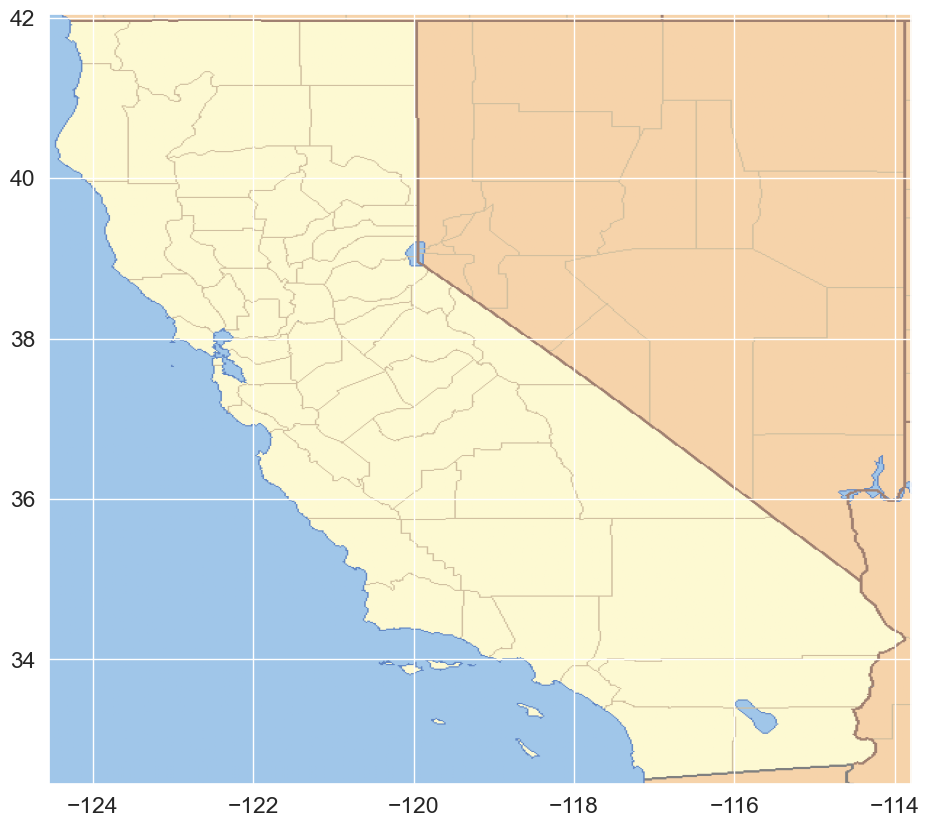

In [40]:
import matplotlib.image as mpimg
california_img = mpimg.imread("california.png")
plt.figure(figsize = (15, 10))
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.show()

The final plot should look like this:

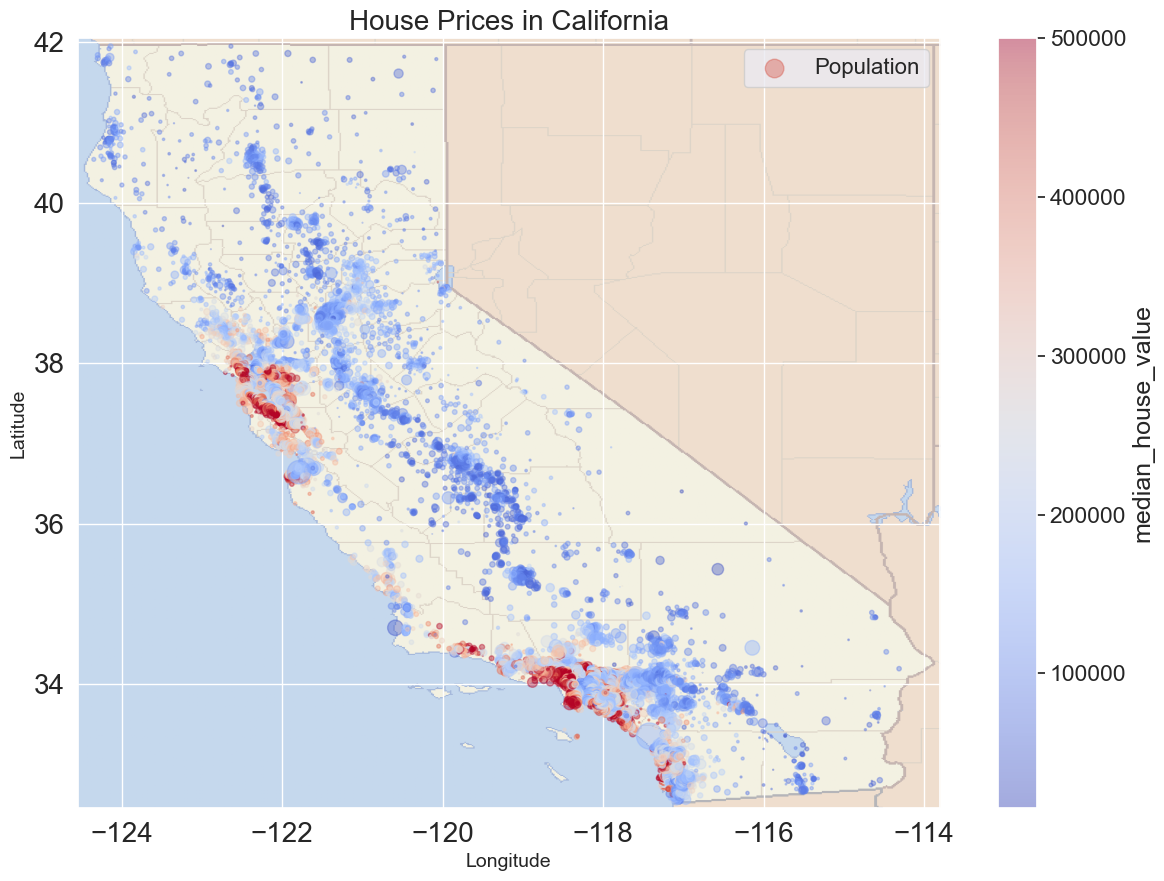

In [41]:
df.plot(kind="scatter", x="longitude", y="latitude",
                       s=df.population/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False)
                      
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.title("House Prices in California", fontsize = 20)
plt.legend(fontsize=16)
plt.show()

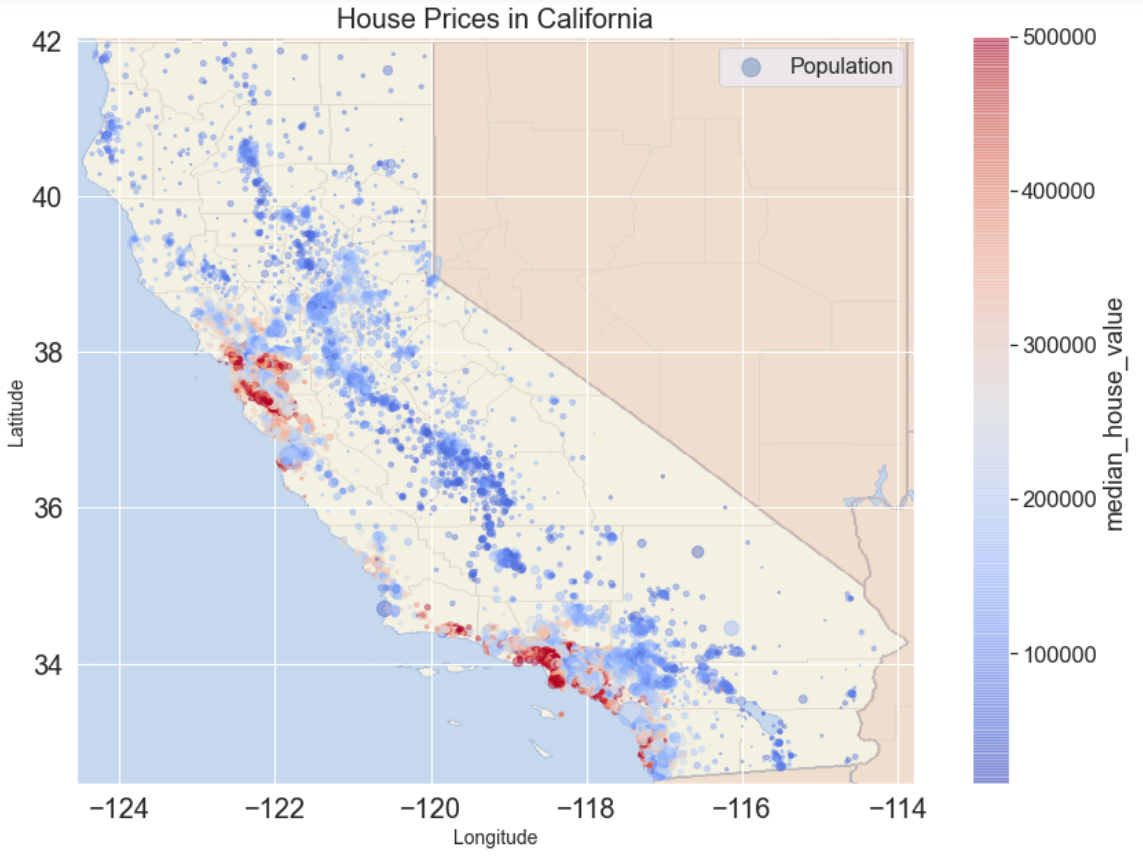

In [43]:
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [45]:
df_loc = df[df.ocean_proximity == prox[3]].copy()

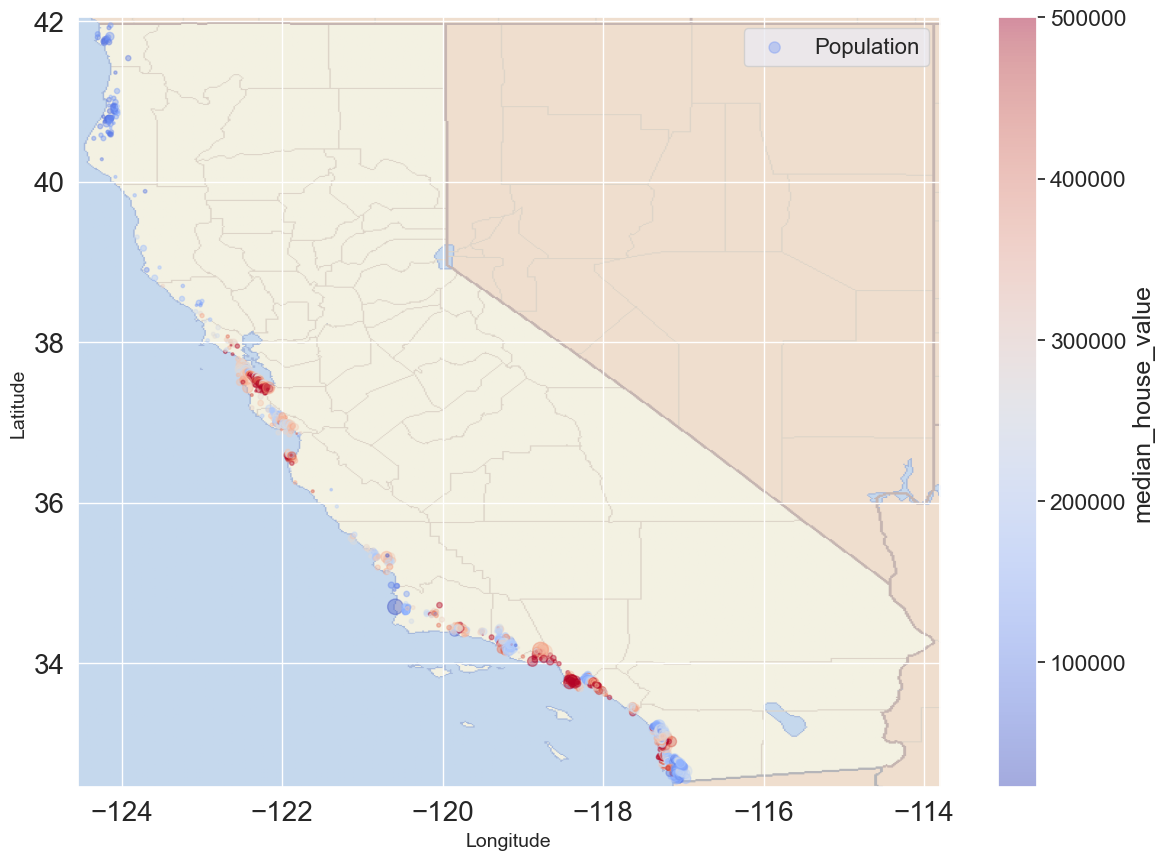

In [46]:
df_loc.plot(kind="scatter", x="longitude", y="latitude",
                       s=df_loc['population']/100, label="Population", figsize = (15, 10),
                       c="median_house_value", cmap="coolwarm",
                       colorbar=True, alpha=0.4, fontsize = 20, sharex = False
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

## Advanced Explanatory Data Analyis with Seaborn

10. __Add__ the additional column __"income_cat"__ with the following income categories:
- lowest 25% -> "Low"
- 25th to 50th percentile -> "Below_Average"
- 50th to 75th percentile -> "Above_Average"
- 75th to 95th percentile -> "High"
- Above 95th percentile -> "Very High"

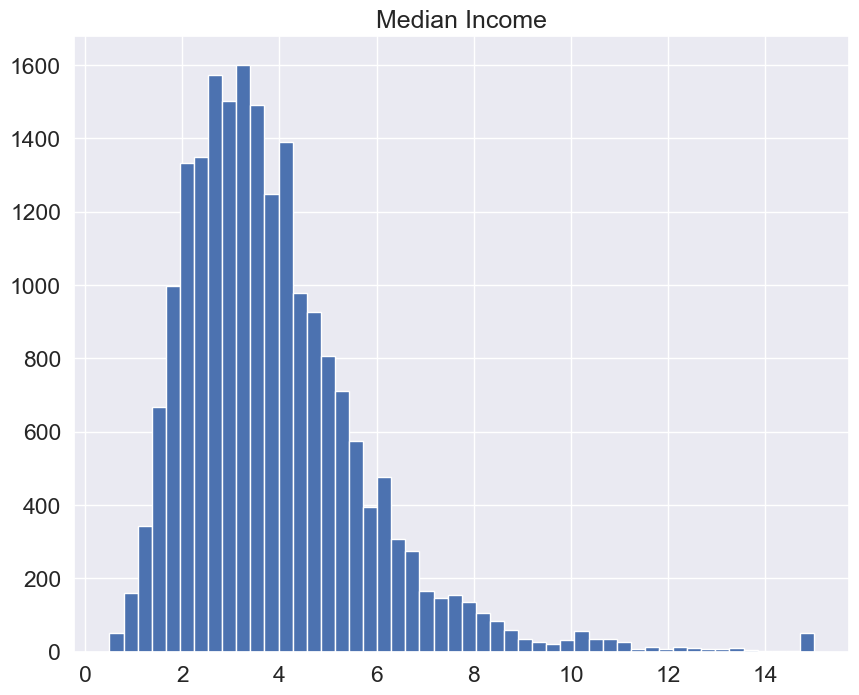

In [48]:
df.median_income.hist(bins=50, figsize=(10,8))
plt.title('Median Income')
plt.show()

In [ ]:
pd.qcut(df.median_income, q = [0,0.25,0.5,0.75,0.95,1]) #

0           (7.3, 15.0]
1           (7.3, 15.0]
2          (4.744, 7.3]
3          (4.744, 7.3]
4        (3.536, 4.744]
              ...      
20635    (0.499, 2.564]
20636    (0.499, 2.564]
20637    (0.499, 2.564]
20638    (0.499, 2.564]
20639    (0.499, 2.564]
Name: median_income, Length: 20429, dtype: category
Categories (5, interval[float64, right]): [(0.499, 2.564] < (2.564, 3.536] < (3.536, 4.744] < (4.744, 7.3] < (7.3, 15.0]]

In [50]:
df['income_cat'] = pd.qcut(df.median_income, q = [0,0.25,0.5,0.75,0.95,1], labels=['low', 'below_avg', 'above_avg', 'high', 'very_high'])

In [54]:
df.income_cat.value_counts(normalize=True)

income_cat
low          0.250037
below_avg    0.249988
above_avg    0.249988
high         0.199961
very_high    0.050027
Name: proportion, dtype: float64

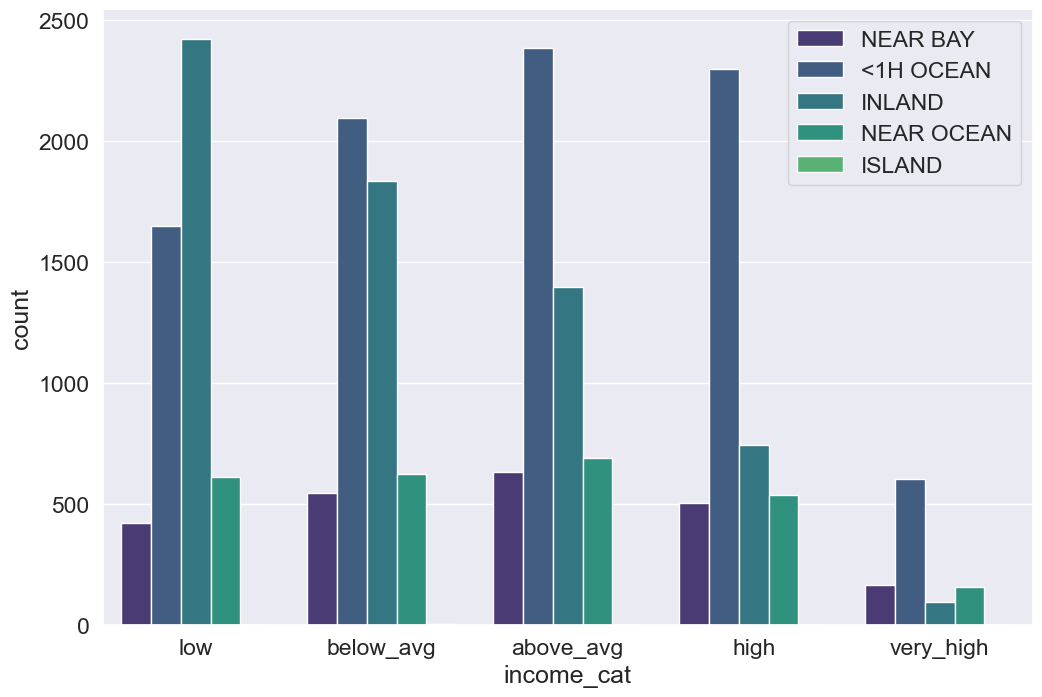

In [55]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5, palette= "viridis")
sns.countplot(data = df, x = "income_cat", hue = "ocean_proximity")
plt.legend(loc = 1)
plt.show()

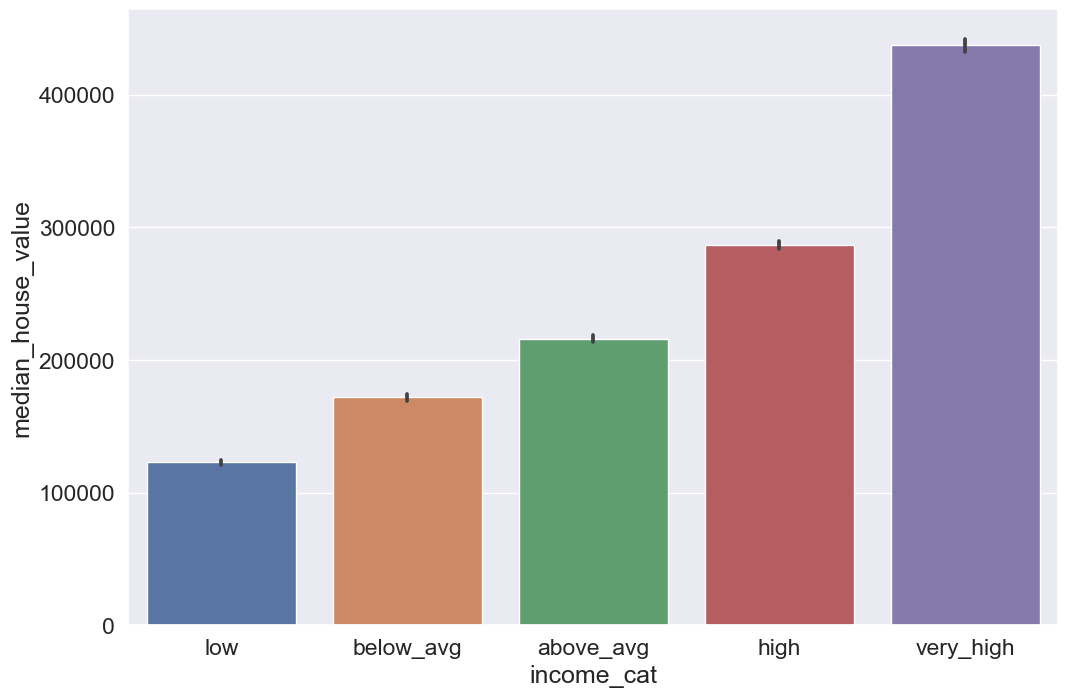

In [58]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "income_cat", y = "median_house_value", dodge = True)
plt.show()

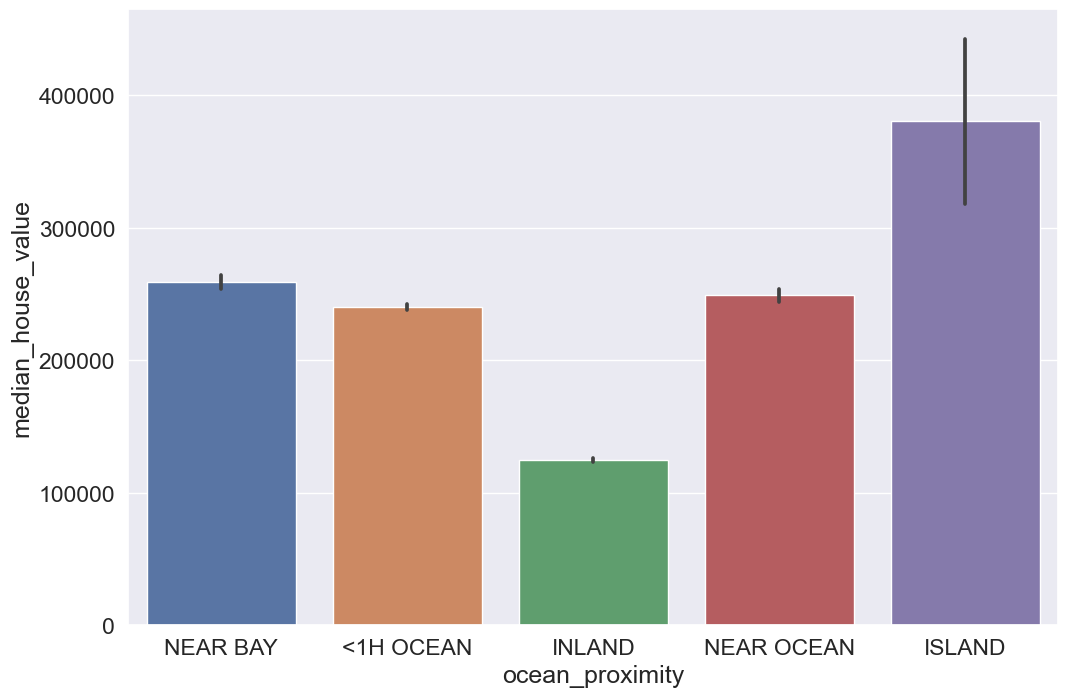

In [59]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.5)
sns.barplot(data = df, x = "ocean_proximity", y = "median_house_value", dodge = True)
plt.show()

12. __Create__ (and interpret) the following Seaborn __Heatmap__ with mean house values for all combinations of income_cat & ocean_proximity:

In [61]:
matrix = df.groupby(["income_cat", "ocean_proximity"]).median_house_value.mean().unstack().drop(columns = ["ISLAND"])
matrix.astype(int)

ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
income_cat,,,,
low,161337,84649,155122,148027
below_avg,197252,115124,220196,208665
above_avg,232278,147836,261965,255500
high,292208,208095,322566,337446
very_high,439784,347571,451015,468739


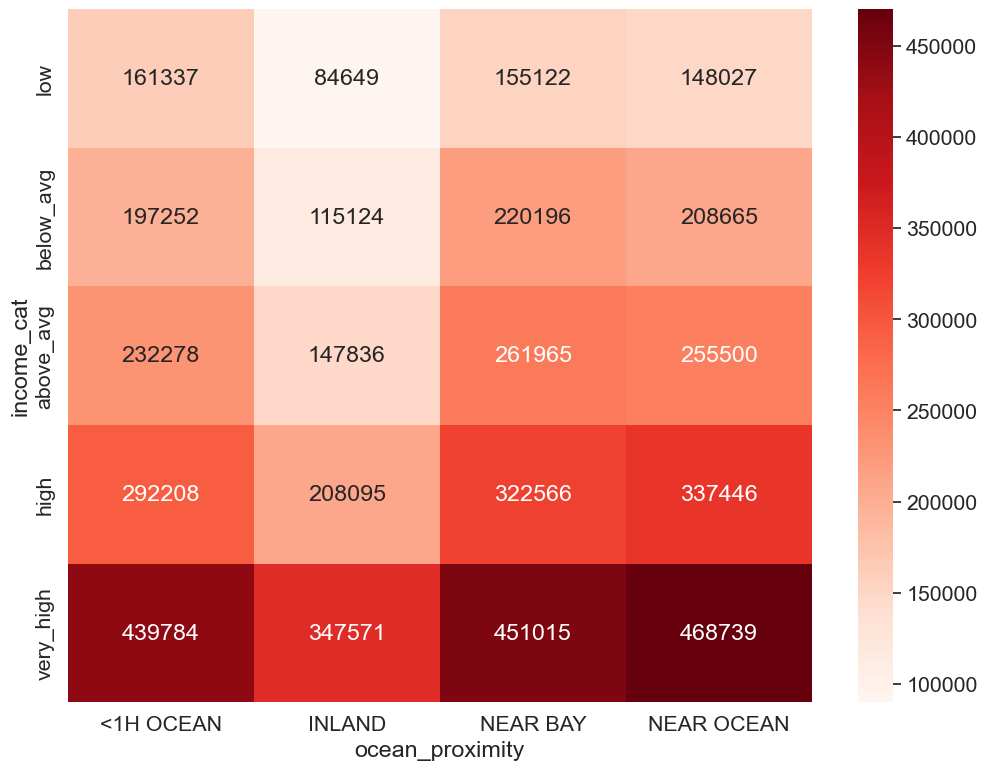

In [62]:
plt.figure(figsize=(12,9))

sns.set(font_scale=1.4)
sns.heatmap(matrix.astype("int"), cmap = "Reds", annot = True, fmt = "d", vmin = 90000, vmax = 470000)
plt.show()

## Feature engineering

In [64]:
label = df.median_house_value.copy()
label

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20429, dtype: float64

In [65]:
features = df.drop(columns=['median_house_value'])

In [66]:
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,2.555556,0.146591,very_high
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,2.109842,0.155797,very_high
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,2.802260,0.129516,high
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,2.547945,0.184458,high
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,2.181467,0.172096,above_avg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,2.560606,0.224625,low
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,3.122807,0.215208,low
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,2.325635,0.215173,low
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,2.123209,0.219892,low


In [67]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20429 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   longitude            20429 non-null  float64 
 1   latitude             20429 non-null  float64 
 2   housing_median_age   20429 non-null  float64 
 3   total_rooms          20429 non-null  float64 
 4   total_bedrooms       20429 non-null  float64 
 5   population           20429 non-null  float64 
 6   households           20429 non-null  float64 
 7   median_income        20429 non-null  float64 
 8   ocean_proximity      20429 non-null  object  
 9   rooms_per_household  20429 non-null  float64 
 10  pop_per_household    20429 non-null  float64 
 11  bedrooms_per_room    20429 non-null  float64 
 12  income_cat           20429 non-null  category
dtypes: category(1), float64(11), object(1)
memory usage: 2.5+ MB


In [68]:
features.select_dtypes('float')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,2.123209,0.219892


In [69]:
import scipy.stats as stats

In [70]:
feat1 = features.select_dtypes('float').apply(lambda x : stats.zscore(x))

In [71]:
feat1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
0,-1.327178,1.051835,0.982245,-0.803953,-0.970467,-0.973604,-0.977135,2.344991,0.741063,-0.049440,-1.151198
1,-1.322187,1.042473,-0.606063,2.041934,1.348104,0.861142,1.670222,2.332460,0.387873,-0.092137,-0.991576
2,-1.332169,1.037792,1.855815,-0.535335,-0.825704,-0.820046,-0.843721,1.782799,1.358446,-0.025807,-1.447268
3,-1.337160,1.037792,1.855815,-0.623654,-0.718913,-0.765330,-0.733850,0.932878,0.188652,-0.050169,-0.494595
4,-1.337160,1.037792,1.855815,-0.462117,-0.612121,-0.759153,-0.629212,-0.013181,0.408571,-0.085276,-0.708955
...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758225,1.800827,-0.288401,-0.444727,-0.389044,-0.512049,-0.443478,-1.216697,-0.176802,-0.048956,0.201866
20636,-0.818115,1.805508,-0.844309,-0.887695,-0.920631,-0.943598,-1.008527,-0.692044,0.329117,0.004899,0.038587
20637,-0.823106,1.777421,-0.923725,-0.175194,-0.125624,-0.369082,-0.174034,-1.143145,-0.101009,-0.071465,0.037980
20638,-0.873014,1.777421,-0.844309,-0.355493,-0.305984,-0.603830,-0.393775,-1.055115,-0.042315,-0.090856,0.119813


In [72]:
pd.options.display.float_format = '{:.2f}'.format

In [73]:
feat1.agg(['mean', 'std'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [74]:
features.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20429, dtype: object

In [ ]:
dummies1

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [105]:
X = features.drop(columns='income_cat', axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,pop_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.33,1.05,0.98,-0.80,-0.97,-0.97,-0.98,2.34,0.74,-0.05,-1.15,0,0,0,1,0
1,-1.32,1.04,-0.61,2.04,1.35,0.86,1.67,2.33,0.39,-0.09,-0.99,0,0,0,1,0
2,-1.33,1.04,1.86,-0.54,-0.83,-0.82,-0.84,1.78,1.36,-0.03,-1.45,0,0,0,1,0
3,-1.34,1.04,1.86,-0.62,-0.72,-0.77,-0.73,0.93,0.19,-0.05,-0.49,0,0,0,1,0
4,-1.34,1.04,1.86,-0.46,-0.61,-0.76,-0.63,-0.01,0.41,-0.09,-0.71,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.76,1.80,-0.29,-0.44,-0.39,-0.51,-0.44,-1.22,-0.18,-0.05,0.20,0,1,0,0,0
20636,-0.82,1.81,-0.84,-0.89,-0.92,-0.94,-1.01,-0.69,0.33,0.00,0.04,0,1,0,0,0
20637,-0.82,1.78,-0.92,-0.18,-0.13,-0.37,-0.17,-1.14,-0.10,-0.07,0.04,0,1,0,0,0
20638,-0.87,1.78,-0.84,-0.36,-0.31,-0.60,-0.39,-1.06,-0.04,-0.09,0.12,0,1,0,0,0


## Machine Learning - Predicting House Values (optional)

Based on the Explanatory Data Analysis, <br>
- select an appropriate ML Model (e.g. Linear Regression or RandomForest Regression)
- split into Train and Test Set
- prepare/engineer Features
- Fit the Model (Train Set)
- Test the Model (Test Set)

In [107]:

y = label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [108]:
forest_reg = RandomForestRegressor(random_state= 42, n_estimators= 500, max_features='sqrt', max_depth=75, min_samples_split= 3)

In [109]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=75, max_features='sqrt', min_samples_split=3,
                      n_estimators=500, random_state=42)

In [110]:
forest_reg.score(X_train,y_train)

0.9710329931223687

In [121]:
y_pred = forest_reg.predict(X_train)
y_pred

array([318856.54546667, 102535.55047619, 121935.39333333, ...,
       402705.74217857, 237832.22888889, 263991.79885714])

In [122]:
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)

In [115]:
forest_rmse

19667.582111564865

In [124]:
forest_reg.score(X_test, y_test)

0.8247491633512724

In [125]:
y_pred1 = forest_reg.predict(X_test)
y_pred1

array([217141.99104762, 391659.59283333,  93008.76947619, ...,
       134540.38333333, 216590.37516667, 165404.64452381])

In [128]:
forest_mse1 = mean_squared_error(y_test, y_pred1)
forest_rmse1 = np.sqrt(forest_mse)
forest_rmse1

19667.582111564865

In [130]:
comp = pd.DataFrame(data = {'true_v': y_test, 'pred' : y_pred1})
comp

,true_v,pred
17085,202800.00,217141.99
1590,382200.00,391659.59
1724,69800.00,93008.77
5200,94200.00,100587.10
12394,318100.00,310862.24
...,...,...
7118,209900.00,200946.19
5764,208300.00,199435.61
12865,114300.00,134540.38
17436,138000.00,216590.38


In [131]:
ae = comp.true_v.sub(comp.pred).abs()

In [132]:
ae

17085   14341.99
1590     9459.59
1724    23208.77
5200     6387.10
12394    7237.76
          ...   
7118     8953.81
5764     8864.39
12865   20240.38
17436   78590.38
6273    13604.64
Length: 6129, dtype: float64

In [134]:
mae = ae.mean()
mae

32227.865392195938

In [135]:
forest_reg.feature_importances_

array([8.27550699e-02, 7.62139713e-02, 4.09713643e-02, 2.27095384e-02,
       2.01846279e-02, 2.33244329e-02, 1.95953187e-02, 2.82972380e-01,
       6.81581596e-02, 9.68220440e-02, 9.56111015e-02, 1.65663039e-02,
       1.41027674e-01, 1.69024995e-04, 5.05440329e-03, 7.86458500e-03])

In [136]:
feature_imp = pd.Series(data = forest_reg.feature_importances_,
                        index = X_train.columns).sort_values(ascending = False)

In [137]:
feature_imp

median_income         0.28
INLAND                0.14
pop_per_household     0.10
bedrooms_per_room     0.10
longitude             0.08
latitude              0.08
rooms_per_household   0.07
housing_median_age    0.04
population            0.02
total_rooms           0.02
total_bedrooms        0.02
households            0.02
<1H OCEAN             0.02
NEAR OCEAN            0.01
NEAR BAY              0.01
ISLAND                0.00
dtype: float64

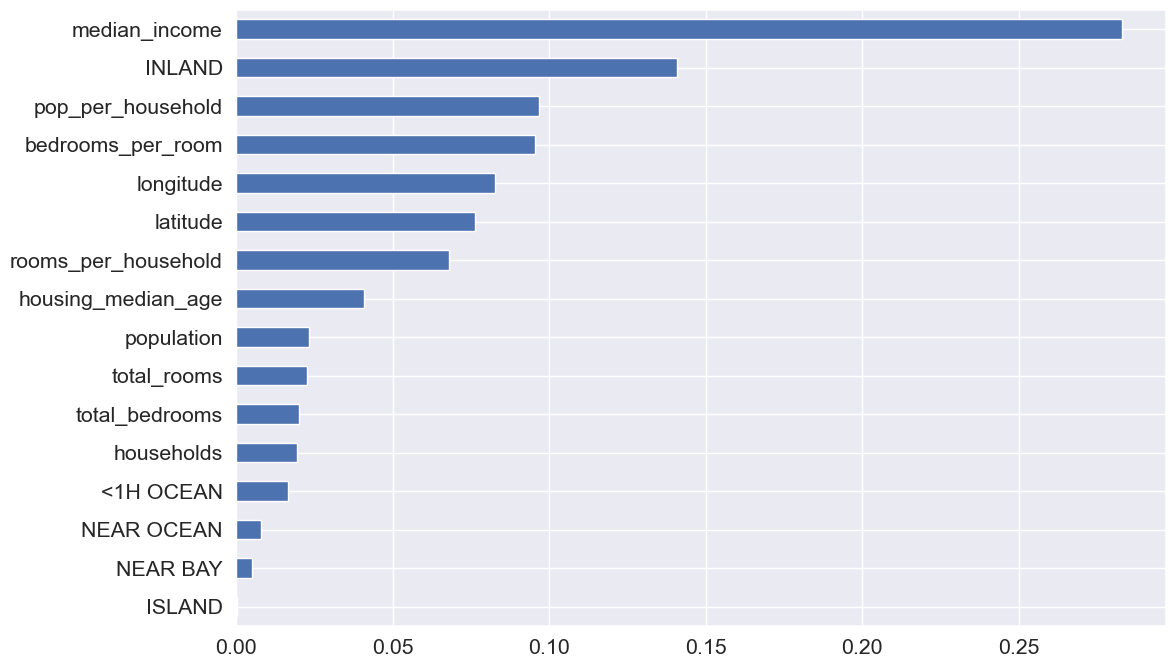

In [138]:
feature_imp.sort_values().plot.barh(figsize = (12, 8))
plt.show()